In [45]:
import pandas as pd                                      #  анализ данных
import numpy as np

from sklearn.model_selection import train_test_split#for test LR
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#собираем данныеэ/gather data

In [27]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [28]:
print(diabetes_dataset.describe)

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [29]:
#видим что у нас 768 данныъх 9 параметров

In [30]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
#видимм что есть грязные данные (например толщина кожи не может быть нулеми)

In [32]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
print(diabetes_dataset.isnull().any().sum())#смотрим в скольких столбцах есть пропущенные значения


0


In [34]:
#значит 

In [35]:
diabetes_dataset = diabetes_dataset[-(diabetes_dataset[diabetes_dataset.columns[1:-1]] == 0).any(axis = 1)]

In [36]:
#мы удаляем все строки содержищие 0 кроме 1 и последнего столбца,так как там может содлерожаться 0

In [37]:
diabetes_dataset.shape   # размер дс

(392, 9)

In [38]:
         diabetes_dataset.describe()       #описывает статистику для числовх столбцов

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
diabetes_dataset.groupby('Outcome').mean() # группируем по результату болезни  со срредними значениями 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [40]:
#видимм что у людей страдающих диабетом значения больеше

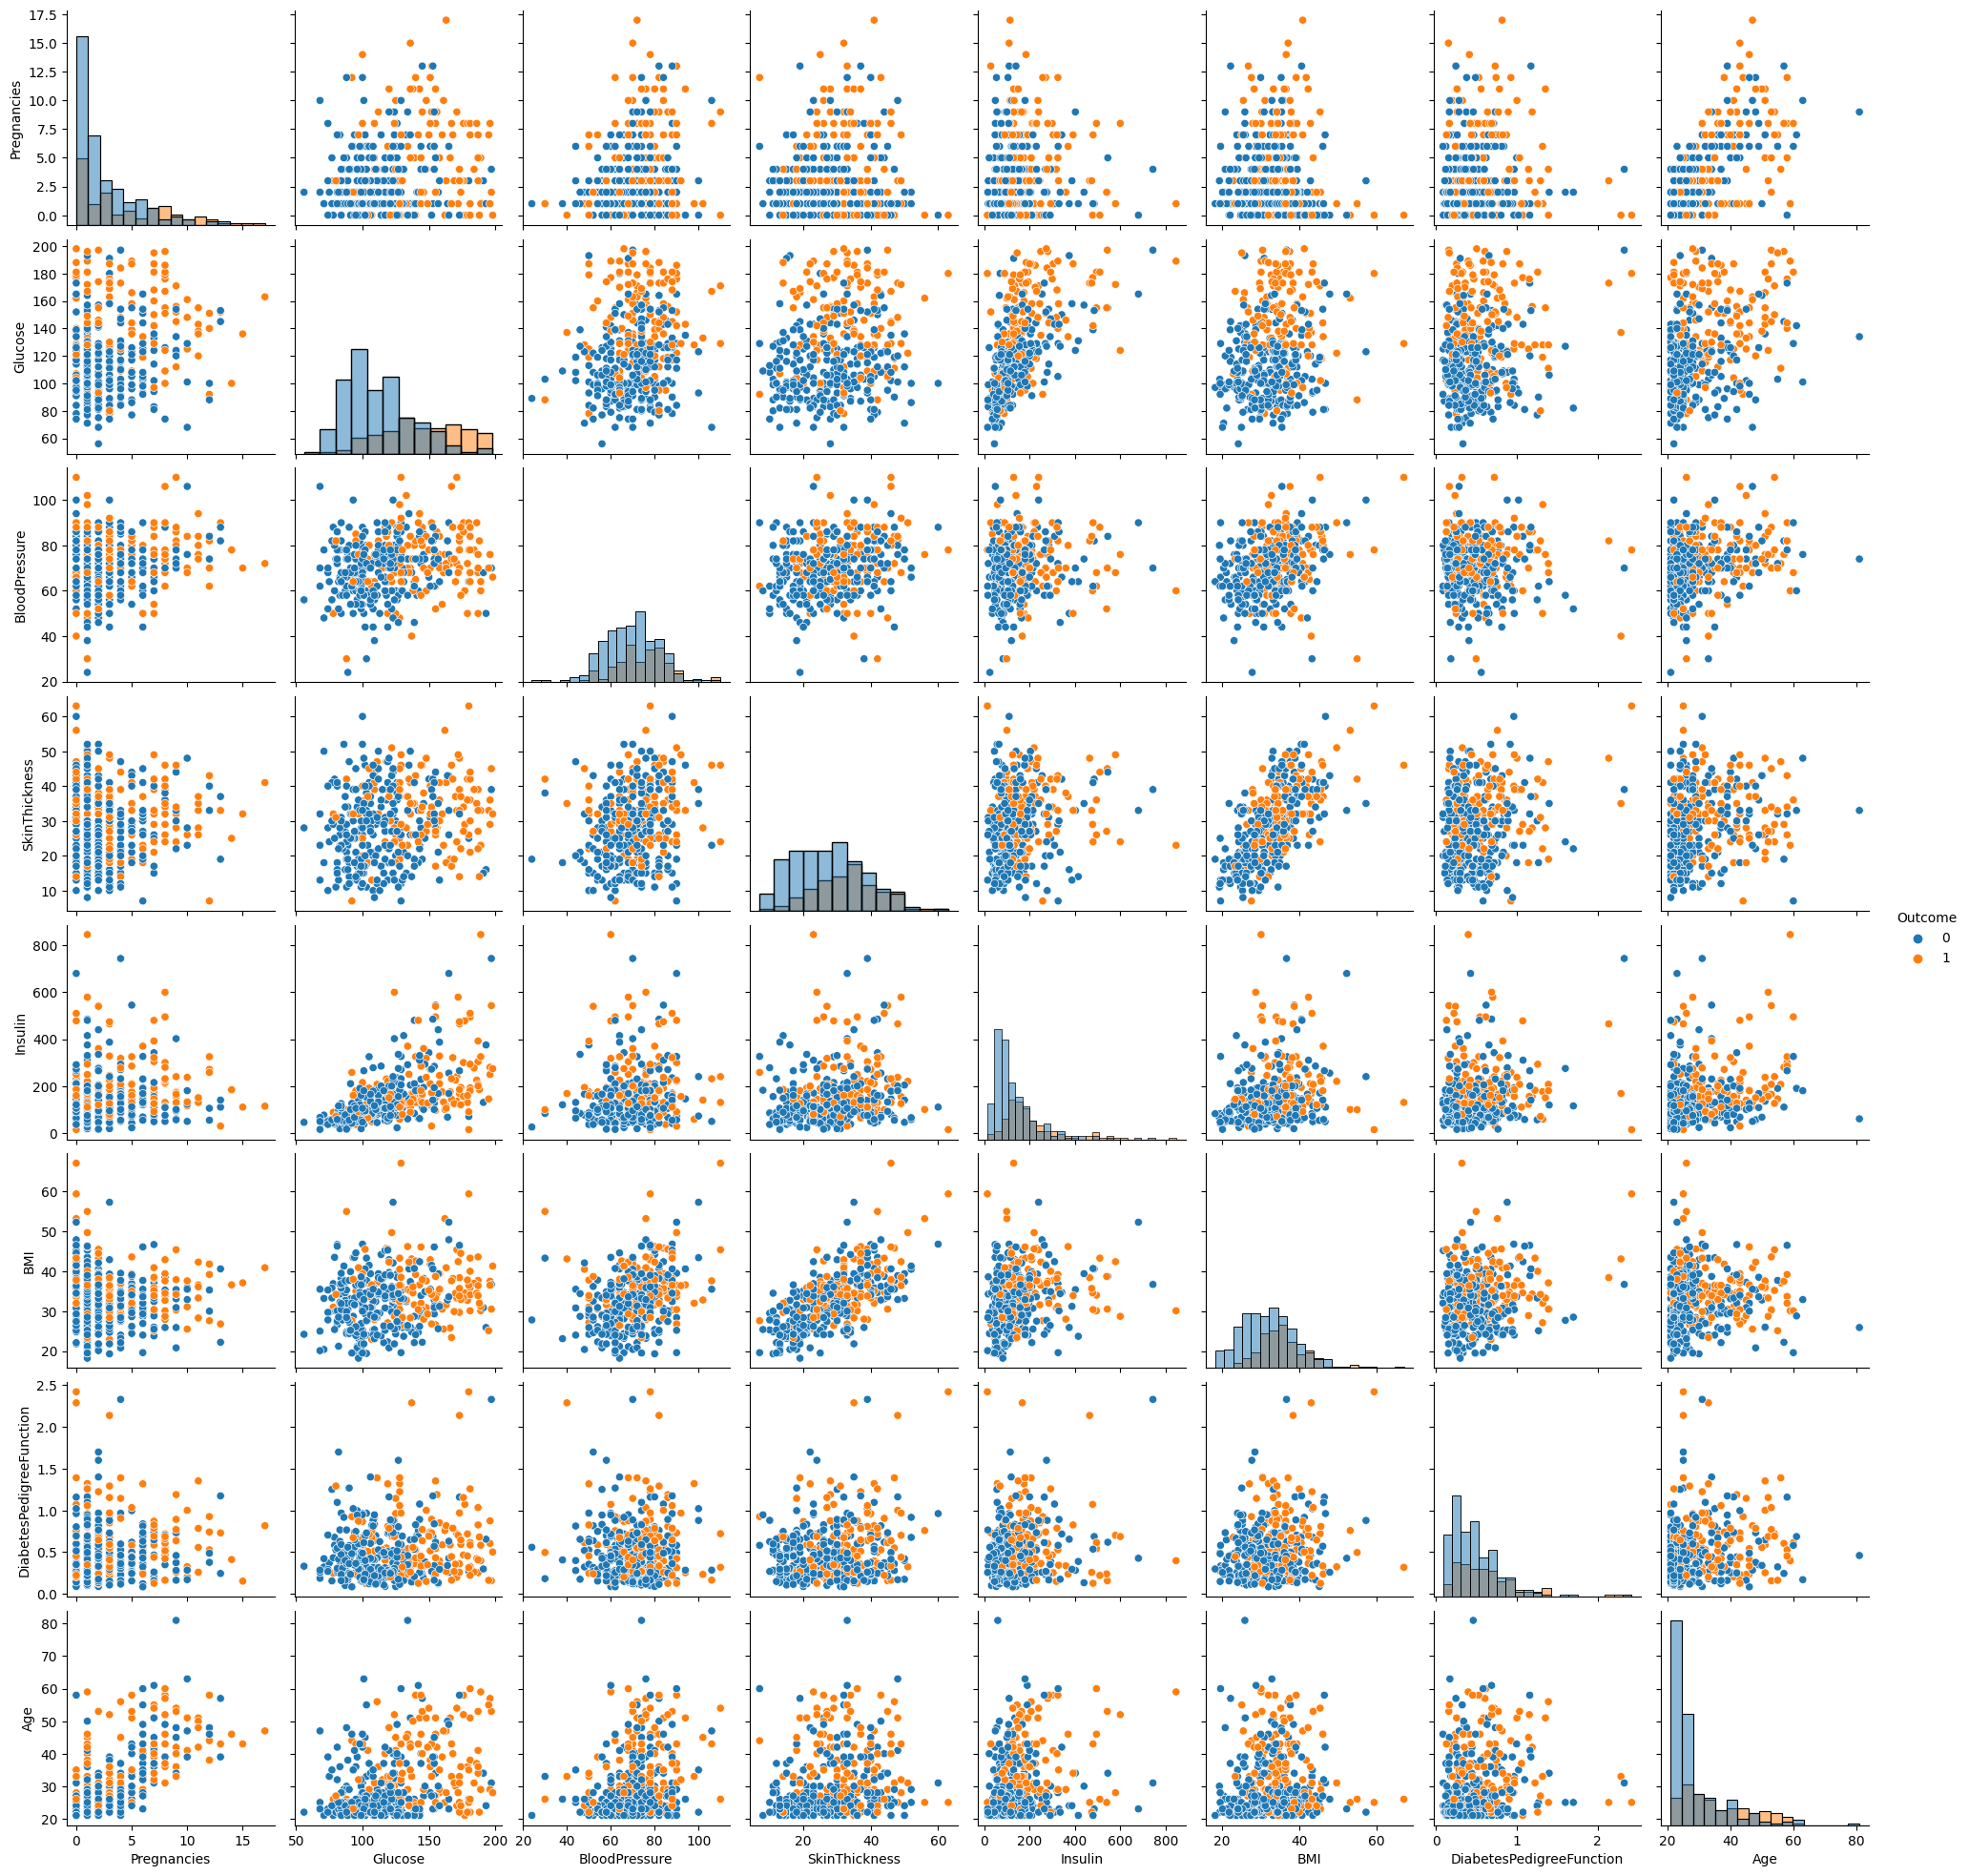

In [46]:
sns.pairplot(diabetes_dataset, hue='Outcome', diag_kind = 'hist');

In [88]:
diabetes_dataset.corr() # взаимосвязб переменных

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [89]:
del diabetes_dataset['Pregnancies'] # удалил столбец с беременностью , т к мужчины нас тоже интересуют

In [90]:
del diabetes_dataset['DiabetesPedigreeFunction']# удалил столбец с ДиабетРодословнаяФункция, т к остальные люди нас тоже ингтересуют

In [91]:
diabetes_dataset.head

<bound method NDFrame.head of      Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  Outcome
3         89             66             23       94  28.1   21        0
4        137             40             35      168  43.1   33        1
6         78             50             32       88  31.0   26        1
8        197             70             45      543  30.5   53        1
13       189             60             23      846  30.1   59        1
..       ...            ...            ...      ...   ...  ...      ...
753      181             88             44      510  43.3   26        1
755      128             88             39      110  36.5   37        1
760       88             58             26       16  28.4   22        0
763      101             76             48      180  32.9   63        0
765      121             72             23      112  26.2   30        0

[392 rows x 7 columns]>

In [92]:
# начинаем ОБУЧЕНИЕ

In [61]:
outcome = diabetes_dataset['Outcome']
features = diabetes_dataset.drop('Outcome', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, outcome, test_size=0.2, random_state=10)
# разбиваем данные на те на которых мы будем учить нашу модель и на те на которых будем тестироватть
# 0.2 это 20% данных нпо которым будем тестить , а на 80% будем учить 

In [62]:
regr = LogisticRegression()
regr.fit(X_train, Y_train) # тренеруем на наших тренировочных данных 
print('training data r-squared', regr.score(X_train, Y_train)) #выписываем коэф детерминайции который показы
#вает насколь наша модель точная
print('test data r-squared', regr.score(X_test, Y_test))


training data r-squared 0.7859424920127795
test data r-squared 0.7468354430379747


C:\Users\zaxar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
accuracy = regr.score(X_test, Y_test)# оценка точности
print('accuracy = ', accuracy * 100, '%')

accuracy =  73.41772151898735 %


In [120]:
pd.DataFrame({'coef':[regr.coef_]}, index = X_train.columns, columns=['coef'])

,coef
Glucose,"[[0.03885307267535832, -0.006115046620956446, ..."
BloodPressure,"[[0.03885307267535832, -0.006115046620956446, ..."
SkinThickness,"[[0.03885307267535832, -0.006115046620956446, ..."
Insulin,"[[0.03885307267535832, -0.006115046620956446, ..."
BMI,"[[0.03885307267535832, -0.006115046620956446, ..."
Age,"[[0.03885307267535832, -0.006115046620956446, ..."


In [122]:
в нейронных сетях нейроны объединяются в слои .слой содержит совокупность нейронов
с едиными входными сигналами

внешние входные сигналы попадают в нейрон  первого слоя 
есть ходной выходной сигнал и скрытые слои
есть монотонные (каждый слой разбит на два блока  возбуждающий и тормозящий)
если только возбуждающие связи то выходной сигнал монотонный неубывающий функция
и есть сети обраных связей ( нейроны входного слоя получают входные сигнал  преобразуют 
                            и передают нейронам скрытых слоев 
                           потом передает выходной сигнал)

In [47]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [58]:
diabetes_dataset.loc[diabetes_dataset['SkinThickness'] == 23]#Показать все строки где значение кожи == 23

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
13,1,189,60,23,846,30.1,0.398,59,1
171,6,134,70,23,130,35.4,0.542,29,1
277,0,104,64,23,116,27.8,0.454,23,0
306,10,161,68,23,132,25.5,0.326,47,1
389,3,100,68,23,81,31.6,0.949,28,0
412,1,143,84,23,310,42.4,1.076,22,0
441,2,83,66,23,50,32.2,0.497,22,0
507,1,130,60,23,170,28.6,0.692,21,0
508,2,84,50,23,76,30.4,0.968,21,0
